<a href="https://colab.research.google.com/github/yeonghun00/real-estate/blob/main/korean_real_estate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import requests
import json

url = 'https://api.kbland.kr/land-extra/statistics/reference?%EC%A3%BC%EC%9B%94%EA%B0%84%EA%B5%AC%EB%B6%84=1&%EA%B8%B0%EC%A4%80%EB%85%84%EC%9B%94%EC%8B%9C%EC%9E%91%EC%9D%BC=2022-01-01&%EA%B8%B0%EC%A4%80%EB%85%84%EC%9B%94%EC%A2%85%EB%A3%8C%EC%9D%BC=2022-12-31'
data = requests.get(url).text
data = json.loads(data)
download_url = data['dataBody']['data']['시계열'][0]['이미지도메인URL'] + data['dataBody']['data']['시계열'][0]['파일경로'] + '/' + data['dataBody']['data']['시계열'][0]['파일명']
xls = pd.ExcelFile('https://file.kbland.kr/image/kbstar/land/statc/tmsr/monthly/ef7684fbb2e40b67.xlsx')

In [2]:
download_url

'https://file.kbland.kr/image/kbstar/land/statc/tmsr/monthly/22b9a1ab69705d4d.xlsx'

In [3]:
xls.sheet_names

['시계열',
 '안내',
 '★기간비교',
 '★지역비교',
 '1.매매종합',
 '2.매매APT',
 '3.매매단독',
 '4.매매연립',
 '5.전세종합',
 '6.전세APT',
 '7.전세단독',
 '8.전세연립',
 '9.KB아파트 월세지수+',
 '11.PIR(월별)',
 '12.J-PIR(월별)',
 '13.KB아파트담보대출PIR',
 '14.NEW_HAI',
 '15.KB-HOI',
 '16.선도50',
 '21.매수우위',
 '22.매매거래',
 '23.전세수급',
 '24.전세거래',
 '25.KB부동산 매매가격 전망지수',
 '26.KB부동산 전세가격 전망지수',
 '27.종합매매전세비',
 '28.아파트매매전세비',
 '29.단독매매전세비',
 '30.연립매매전세비',
 '31.전용면적별(구)APT매매',
 '32.면적별매매종합',
 '33.면적별단독매매',
 '34.면적별연립매매',
 '35.전용면적별(구)APT전세',
 '36.면적별전세종합',
 '37.면적별단독전세',
 '38.면적별연립전세',
 '39.전용면적별APT매매지수',
 '40.전용면적별APT전세지수',
 '41.평균매매',
 '42.평균전세',
 '43.중위매매',
 '44.중위전세',
 '45.㎡당평균매매',
 '46.㎡당평균전세',
 '47.㎡당아파트평균매매',
 '48.㎡당아파트평균전세',
 '49.㎡당 5분위 아파트 매매',
 '50.㎡당 5분위 아파트전세',
 '51.5분위(종합매매)',
 '52.5분위(종합전세)',
 '53.5분위(아파트매매)',
 '54.5분위(아파트전세)',
 '55.면적별(구)APT매매평균',
 '56.면적별(구)APT전세평균',
 '57.면적별APT매매평균',
 '58.면적별APT전세평균',
 '59.전월세전환율',
 '60.KB 오피스텔']

**1. Housing purchase price composite indices**




매매종합

In [4]:
hpi_df = pd.read_excel(xls, '1.매매종합', header=3)

In [5]:
hpi_df = hpi_df[:hpi_df[hpi_df['Classification'].isnull()].index[0]]

In [6]:
# Date Formatting
from datetime import datetime

def date_format(df):
  c = []
  year = 0
  for i in df['Classification']:
    if str(i)[-1] == '1':
      year = str(i)[:-2]
      if len(year) < 3: c.append('19' + year + '/1')
      else: c.append(year + '/1')
    else:
      if len(year) < 3: c.append('19' + year + '/' + str(int(i)))
      else: c.append(year + '/' + str(int(i)))
  c = [datetime.strptime(x, '%Y/%m') for x in c] 
  df['Classification'] = c
  return df.set_index('Classification')

In [7]:
hpi_df = date_format(hpi_df)

In [8]:
hpi_df

,Total,Seoul,Northern seoul,Gangbuk-gu,Gwangjin-gu,Nowon-gu,Dobong-gu,Dongdaemun-gu,Mapo-gu,Seodaemun-gu,...,Uichang,Jinhae,Yangsan,Geoje,Jinju,Gimhae,Tongyoung,Jeju-do,Jeju/\nSeogwipo,Non-Metropolitan Area
Classification,,,,,,,,,,,,,,,,,,,,,
1986-01-01,34.656084,30.043817,41.939986,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1986-02-01,34.656084,30.043817,41.88915,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1986-03-01,34.707965,30.002377,41.88915,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1986-04-01,34.448563,29.836618,41.736641,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1986-05-01,34.292922,29.587979,41.279114,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-09-01,121.591133,124.952358,126.037762,124.599371,116.192987,144.950073,133.062383,124.383338,124.885848,120.289067,...,104.077816,105.801478,NaN,NaN,101.544613,107.420511,NaN,NaN,103.709931,107.120042
2021-10-01,122.864781,126.325135,127.307387,129.423898,116.297279,146.302304,134.450298,125.522139,125.836891,120.637505,...,104.535031,106.334227,NaN,NaN,101.794449,108.503495,NaN,NaN,104.153005,107.910854
2021-11-01,124.221092,127.251681,128.10705,129.673769,116.876711,148.035610,134.886617,126.529630,126.815806,120.877025,...,105.626930,107.766484,NaN,NaN,102.724364,109.491791,NaN,NaN,105.052231,109.257573


In [9]:
s = hpi_df.iloc[0].isna() == False
cities = s[s].index.values
cities = ['Total', 'Seoul', 'Busan']

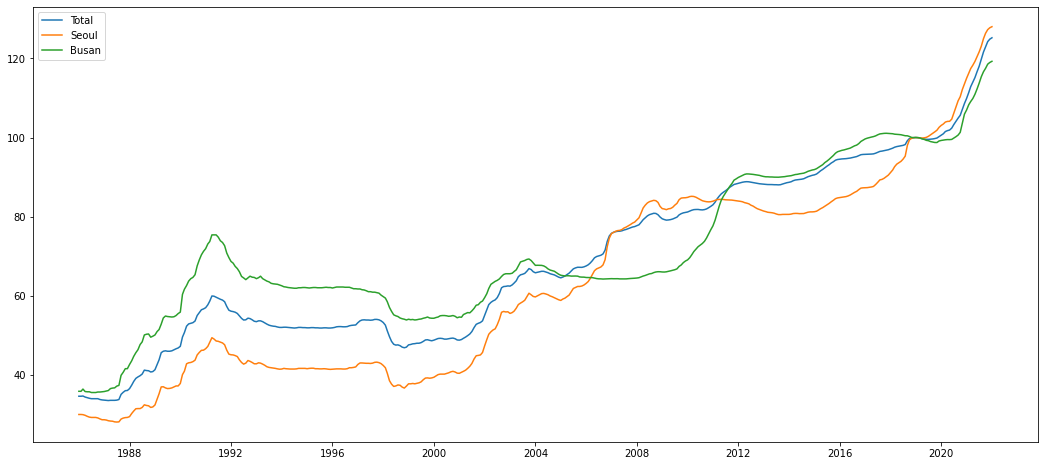

In [10]:
import matplotlib.pyplot as plt

plt.figure(figsize=(18,8))
for city in cities:
  plt.plot(hpi_df[city])
plt.legend(cities)
plt.show()


**2. Housing jeonse price composite indices**

In [11]:
hjp_df = pd.read_excel(xls, '5.전세종합', header=3)
hjp_df = date_format(hjp_df)

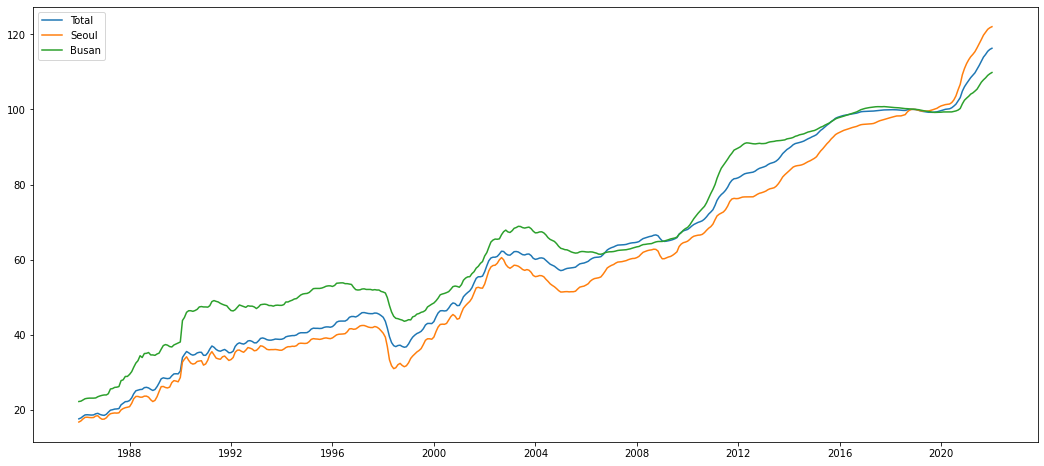

In [12]:
plt.figure(figsize=(18,8))
for city in cities:
  plt.plot(hjp_df[city])
plt.legend(cities)
plt.show()



**3. Ratio of jeonse to purchase price for housing**

종합매매전세비

In [13]:
rjp_df = pd.read_excel(xls, '27.종합매매전세비', header=2)
rjp_df = rjp_df[:rjp_df[rjp_df['Unnamed: 0'].isnull()].index[0]]

In [14]:
def date_format2(df):
  dates = []
  y = 0
  for d in df['Unnamed: 0']:
    if type(d) == str: 
      y = d[d.find("'")+1:d.find('.')]
      dates.append(y+'/'+(d[d.find('.')+1:]))
    else: dates.append(y+'/'+str(d))

  dates = [datetime.strptime(x, '%y/%m') for x in dates] 
  df['Unnamed: 0'] = dates
  return df.set_index('Unnamed: 0')

In [15]:
rjp_df = date_format2(rjp_df)
rjp_df

,Total,Seoul,Northern seoul,Southern Seoul,6 Large Cities,Busan,Daegu,Incheon,Gwangju,Daejeon,...,Gyeonggi-do,Gangwon,Chungbuk,Chungnam,Jeonbuk,Jeonnam,Gyeongbuk,Gyeongnam,Jeju/\nSeogwipo,Non Metropolitan Area
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
2011-06-01,54.995742,47.081021,47.997733,46.176432,60.233835,61.318798,63.457160,48.018278,67.120289,63.583149,...,50.685280,57.278134,60.911362,57.325058,62.368713,58.000384,64.134851,59.420633,58.532243,59.998121
2011-07-01,55.183782,47.523669,48.365536,46.692933,60.198286,61.285864,63.495761,48.182729,67.111239,63.018937,...,51.113110,57.375782,60.730726,57.584254,62.092936,58.046818,64.282477,59.371579,58.498286,59.993477
2011-08-01,55.512878,48.227905,49.074596,47.392409,60.237012,61.290853,63.597096,48.428823,67.177023,62.631847,...,51.789446,57.151037,60.913197,57.895829,61.790934,57.940809,64.251640,59.353343,59.131604,59.991193
2011-09-01,55.968106,49.027421,49.939968,48.126941,60.419438,61.311359,63.815651,48.915756,67.494405,62.460214,...,52.625557,57.394449,61.049273,58.135446,61.577714,58.153763,64.208594,59.514929,59.100398,60.084697
2011-10-01,56.243344,49.488306,50.423850,48.565133,60.537230,61.350345,63.930203,49.319463,67.569968,62.312969,...,53.128813,57.415263,61.087234,58.258976,61.468952,58.373476,64.244927,59.650789,59.134717,60.155035
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-09-01,63.2698,58.280457,58.613469,57.956567,63.599073,58.420905,65.889796,66.569465,64.976803,62.799458,...,63.649056,67.200800,68.811533,70.391542,70.427371,65.390562,71.234557,66.297696,58.447581,67.226934
2021-10-01,63.011851,57.990684,58.268375,57.720599,63.369867,58.316487,65.942242,66.009149,64.477175,62.554941,...,63.314921,66.933369,68.701395,70.043359,70.167920,65.412210,70.978560,66.212202,58.214475,67.045749
2021-11-01,62.839714,57.954194,58.325468,57.593089,63.118282,58.192551,66.028084,65.551069,63.682388,62.164308,...,63.086993,65.858817,68.578606,70.052056,69.876478,65.352161,71.160042,66.215128,57.903716,66.918140


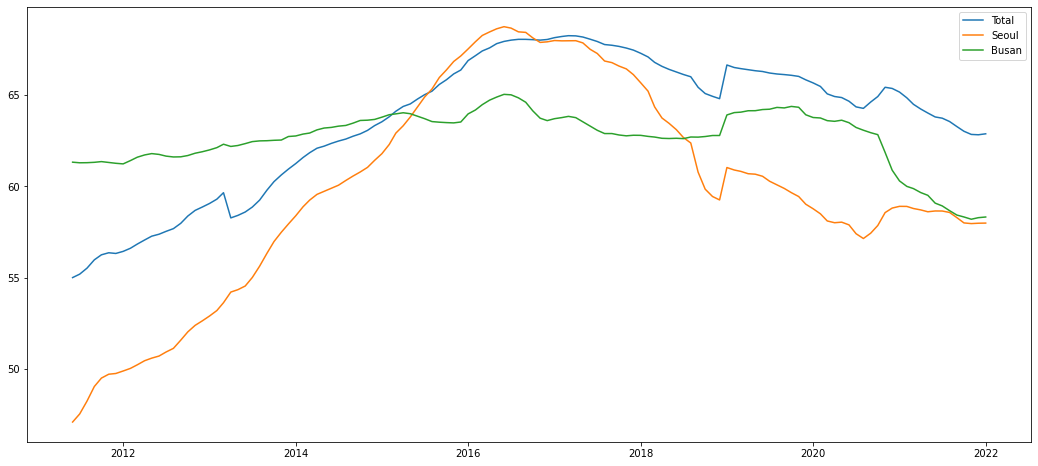

In [16]:
plt.figure(figsize=(18,8))
for city in cities:
  plt.plot(rjp_df[city])
plt.legend(cities)
plt.show()

아파트매매전세비 (Ratio of Jeonse to Purchase Price for Apartment)

In [17]:
rja_df = pd.read_excel(xls, '28.아파트매매전세비', header=2)
rja_df = rja_df[:rja_df[rja_df['Unnamed: 0'].isnull()].index[0]]

In [18]:
rja_df = date_format2(rja_df)
rja_df

,Total,Seoul,Northern seoul,Gangbuk-gu,Gwangjin-gu,Nowon-gu,Dobong-gu,Dongdaemun-gu,Mapo-gu,Seodaemun-gu,...,Hwaseong,Gangwon,Chungbuk,Chungnam,Jeonbuk,Jeonnam,Gyeongbuk,Gyeongnam,Jeju/\nSeogwipo,Non Metropolitan Area
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
1998-12-01,50.823605,47.919568,49.900000,-,-,-,-,-,-,-,...,-,-,-,-,-,-,-,-,-,50.595563
1999-01-01,51.640135,48.710126,51.000000,-,-,-,-,-,-,-,...,-,-,-,-,-,-,-,-,-,51.423717
1999-02-01,53.52714,51.415018,54.200000,-,-,-,-,-,-,-,...,-,-,-,-,-,-,-,-,-,53.358133
1999-03-01,54.8,52.800000,55.900000,-,-,-,-,-,-,-,...,-,-,-,-,-,-,-,-,-,54.600000
1999-04-01,55.6,53.600000,56.800000,-,-,-,-,-,-,-,...,-,-,-,-,-,-,-,-,-,55.400000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-09-01,66.536122,54.901862,56.044984,59.435088,54.508668,51.383775,54.343548,57.758002,55.014991,56.231357,...,65.098388,77.002879,76.387579,78.875742,76.603148,75.212275,77.395891,73.308782,59.761196,74.887720
2021-10-01,66.193077,54.552006,55.729930,59.03687,54.439568,51.065819,54.111442,57.448084,54.887065,55.912469,...,64.096669,76.765991,76.138317,78.292624,76.237765,75.285979,77.046152,73.222561,58.478979,74.626144
2021-11-01,65.93233,54.484208,55.833422,58.917452,54.336377,51.456617,54.140255,57.258811,55.017315,56.139554,...,63.57932,75.576184,75.852278,78.254127,75.809378,75.294383,77.11684,73.254098,56.769631,74.434156


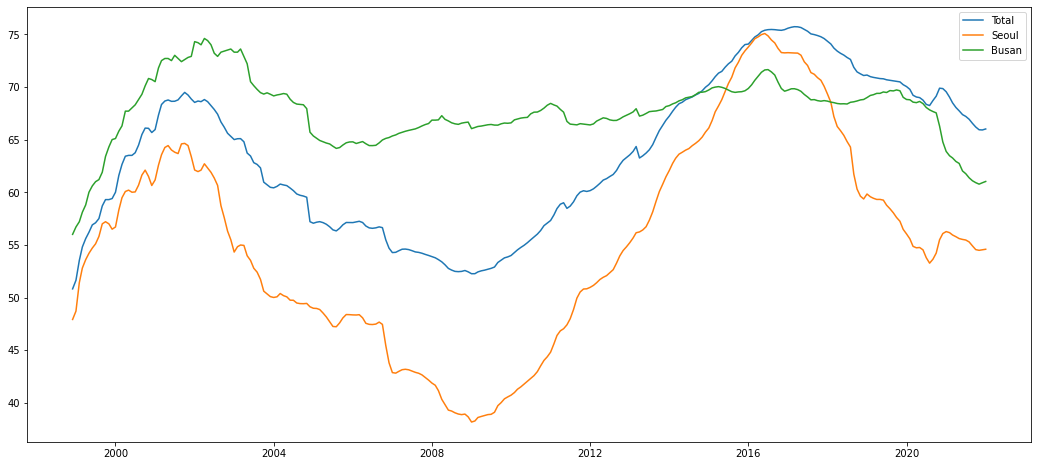

In [19]:
plt.figure(figsize=(18,8))
for city in cities:
  plt.plot(rja_df[city])
plt.legend(cities)
plt.show()

단독매매전세비 (Ratio of Jeonse to Purchase Price for Houses)

In [20]:
rjs_df = pd.read_excel(xls, '29.단독매매전세비', header=2)
rjs_df = rjs_df[:rjs_df[rjs_df['Unnamed: 0'].isnull()].index[0]]

In [21]:
rjs_df = date_format2(rjs_df)
rjs_df

,Total,Seoul,Northern seoul,Southern Seoul,6 Large Cities,Busan,Daegu,Incheon,Gwangju,Daejeon,...,Gyeonggi-do,Gangwon,Chungbuk,Chungnam,Jeonbuk,Jeonnam,Gyeongbuk,Gyeongnam,Jeju/\nSeogwipo,Non Metropolitan Area
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
2011-06-01,41.627113,38.441690,38.126422,38.955217,42.405526,42.130103,46.375177,35.479358,44.723173,38.094591,...,41.887302,-,-,-,-,-,-,-,-,42.719251
2011-07-01,41.703667,38.529653,38.202347,39.062787,42.577853,42.562296,46.366638,35.591744,44.875598,38.116720,...,41.981340,-,-,-,-,-,-,-,-,42.677803
2011-08-01,41.751069,38.694305,38.360069,39.238728,42.598380,42.640337,46.426340,35.604839,44.883471,37.852548,...,42.071244,-,-,-,-,-,-,-,-,42.656705
2011-09-01,41.834529,38.873142,38.582773,39.346111,42.700517,42.896371,46.526961,35.737573,44.847906,37.615406,...,42.049706,-,-,-,-,-,-,-,-,42.712144
2011-10-01,41.867685,38.975295,38.698925,39.425463,42.653598,42.899507,46.527700,35.463011,44.707151,37.686319,...,42.235119,-,-,-,-,-,-,-,-,42.708748
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-09-01,45.874469,41.942836,42.450275,41.128280,44.113283,43.819269,45.294756,43.788247,45.025767,40.468243,...,45.933666,36.790959,49.806393,51.091543,53.367999,51.350799,52.255931,43.664523,53.428844,48.883081
2021-10-01,45.87511,41.934089,42.478426,41.060305,44.126285,43.838447,45.350598,43.824352,45.025767,40.391186,...,45.946122,36.790959,49.806393,51.091543,53.340196,51.292325,52.25911,43.664523,53.428844,48.873051
2021-11-01,45.859302,41.913392,42.471911,41.016843,44.133148,43.833702,45.386127,43.835118,45.025767,40.391186,...,45.875724,36.790959,49.806393,51.091543,53.340196,51.201854,52.25911,43.667798,53.428844,48.863191


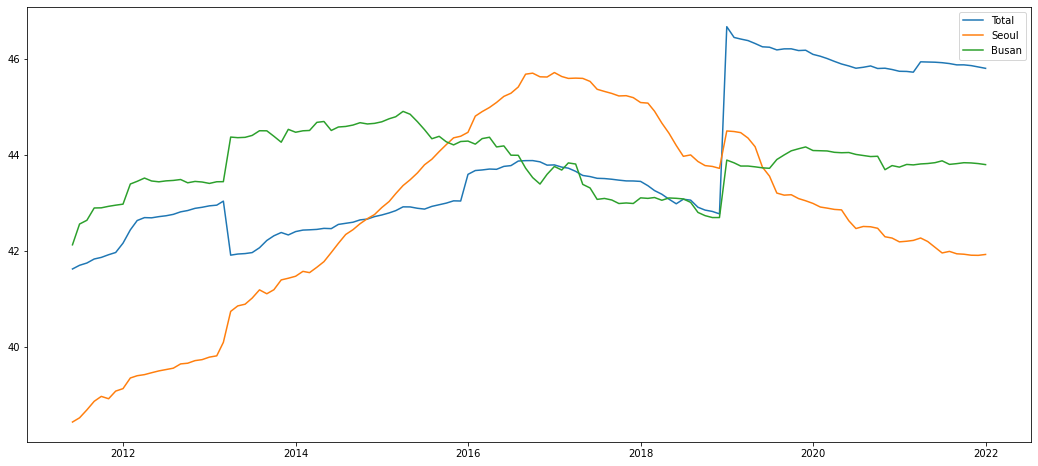

In [22]:
plt.figure(figsize=(18,8))
for city in cities:
  plt.plot(rjs_df[city])
plt.legend(cities)
plt.show()

연립매매전세비 (Ratio of Jeonse to Purchase Price for Flats)

In [23]:
rjf_df = pd.read_excel(xls, '30.연립매매전세비', header=2)
rjf_df = rjf_df[:rjf_df[rjf_df['Unnamed: 0'].isnull()].index[0]]

In [24]:
rjf_df = date_format2(rjf_df)
rjf_df

,Total,Seoul,Northern seoul,Southern Seoul,6 Large Cities,Busan,Daegu,Incheon,Gwangju,Daejeon,...,Gyeonggi-do,Gangwon,Chungbuk,Chungnam,Jeonbuk,Jeonnam,Gyeongbuk,Gyeongnam,Jeju/\nSeogwipo,Non Metropolitan Area
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
2011-06-01,57.889982,53.186044,53.483539,52.870716,63.938152,72.077696,69.853073,53.269079,60.193371,74.242168,...,54.080743,-,-,-,-,-,-,-,-,69.136849
2011-07-01,58.115027,53.564782,53.736096,53.383199,64.000812,72.231608,70.030944,53.333693,60.184939,74.029840,...,54.365827,-,-,-,-,-,-,-,-,69.072545
2011-08-01,58.468538,54.263297,54.502272,54.009997,64.063925,72.297658,70.087227,53.631547,60.088102,73.272217,...,54.660299,-,-,-,-,-,-,-,-,69.119553
2011-09-01,58.904105,54.841740,55.282023,54.375065,64.305584,72.122218,70.089284,54.031956,60.025041,74.400285,...,55.265817,-,-,-,-,-,-,-,-,69.081760
2011-10-01,59.204072,55.286643,55.674153,54.875905,64.343735,71.879809,70.109253,54.275958,60.066459,74.367360,...,55.771063,-,-,-,-,-,-,-,-,69.021412
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-09-01,68.47782,69.738142,69.973376,69.511818,67.948911,64.429801,67.960645,69.913063,68.653783,72.149729,...,66.518153,74.486536,71.158752,73.195846,73.254841,67.238713,75.130242,70.478284,65.60813,70.604698
2021-10-01,68.323236,69.446071,69.411977,69.478873,67.864333,64.443607,68.008927,69.672392,68.653783,72.099908,...,66.429214,74.486536,71.158752,73.207483,73.195513,67.27816,75.130242,70.478284,65.60813,70.601448
2021-11-01,68.292708,69.455483,69.424939,69.484871,67.843142,64.367248,68.010475,69.668220,68.653783,72.160438,...,66.321401,74.486536,71.158752,73.191851,73.195513,67.27816,75.111536,70.53808,65.60813,70.606167


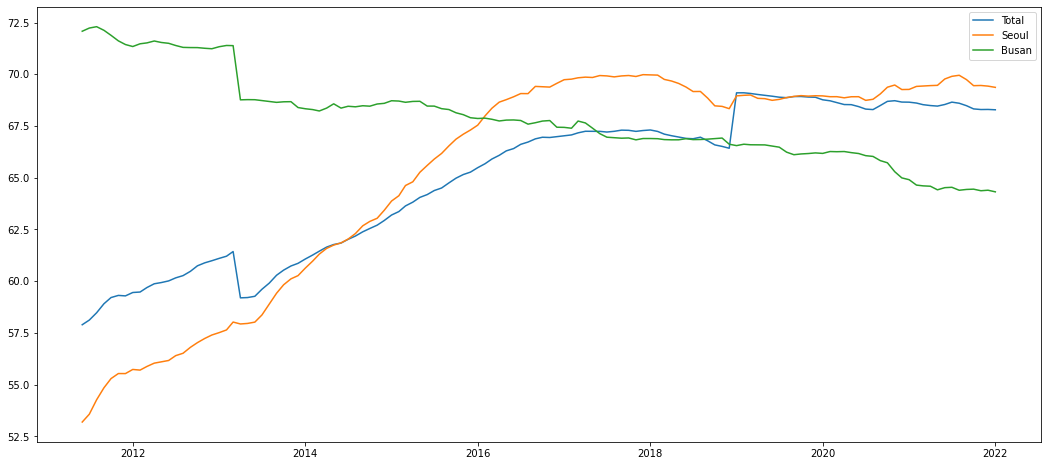

In [25]:
plt.figure(figsize=(18,8))
for city in cities:
  plt.plot(rjf_df[city])
plt.legend(cities)
plt.show()

Housing affordability index


**4. Trade index**

Trends on the Sell / Buy activities by region

In [26]:
'''
>: Seller's No.> Buyer's No.	
<: Seller's No.< Buyer's No.	
≒: Seller's No.≒Buyer's No.	
I: Buyer Superiority Index
'''

"\n>: Seller's No.> Buyer's No.\t\n<: Seller's No.< Buyer's No.\t\n≒: Seller's No.≒Buyer's No.\t\nI: Buyer Superiority Index\n"

In [27]:
ta_df = pd.read_excel(xls, '21.매수우위', header=1, usecols="A:CS")
ta_df['Unnamed: 0'].fillna(method='bfill', inplace=True)
ta_df = ta_df[:ta_df[ta_df['Unnamed: 0'].isnull()].index[0]]
ta_df = date_format2(ta_df)

In [28]:
# format columns
import numpy as np
city_columns = [x.encode("ascii", "ignore").decode().replace(' ','') for x in ta_df.columns][::4] 
symbol_columns = list(dict.fromkeys([''.join(filter(lambda y: y in ['>','<','≒','I'], x)) for x in ta_df.iloc[1]]))
ta_df.columns = [c+'_'+s for c in city_columns for s in symbol_columns]
ta_df = ta_df.iloc[2:]
ta_df = ta_df.replace('-', np.nan)
ta_df

,Total_>,Total_<,Total_≒,Total_I,Seoul_>,Seoul_<,Seoul_≒,Seoul_I,Northernseoul_>,Northernseoul_<,...,Gyeongsangnam-do_≒,Gyeongsangnam-do_I,NonMetropolitanArea_>,NonMetropolitanArea_<,NonMetropolitanArea_≒,NonMetropolitanArea_I,Jeju_>,Jeju_<,Jeju_≒,Jeju_I
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
2000-01-01,72.534464,4.984093,22.481442,32.449629,60.346696,6.608884,33.044420,46.262189,NaN,NaN,...,NaN,NaN,83.281412,3.946002,12.772586,20.664590,NaN,NaN,NaN,NaN
2000-02-01,79.123173,6.054280,14.822547,26.931106,66.420275,11.193242,22.386484,44.772967,NaN,NaN,...,NaN,NaN,90.356394,2.935010,6.708595,12.578616,NaN,NaN,NaN,NaN
2000-03-01,78.787879,4.444444,16.767677,25.656566,73.300000,9.900000,16.800000,36.600000,NaN,NaN,...,NaN,NaN,87.869521,1.834862,10.295617,13.965341,NaN,NaN,NaN,NaN
2000-04-01,80.360721,2.605210,17.034068,22.244489,72.500000,3.100000,24.400000,30.600000,NaN,NaN,...,NaN,NaN,79.800000,0.900000,19.300000,21.100000,NaN,NaN,NaN,NaN
2000-05-01,81.451613,1.209677,17.338710,19.758065,68.700000,3.100000,28.200000,34.400000,NaN,NaN,...,NaN,NaN,88.798371,0.916497,10.285132,12.118126,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-09-01,17.052553,25.358618,57.588829,108.306064,11.787993,18.037372,70.174635,106.249379,13.294255,17.004810,...,57.820530,120.172231,18.042051,31.689511,50.268438,113.647460,8.333333,25.000000,66.666667,116.666667
2021-10-01,19.211832,19.107856,61.680313,99.896024,15.344412,11.829459,72.826129,96.485048,18.638635,11.269968,...,57.376255,104.303828,17.496444,27.372965,55.130591,109.876521,4.347826,30.434783,65.217391,126.086957
2021-11-01,32.514916,7.970128,59.514956,75.455212,36.545597,3.408928,60.045474,66.863331,39.938567,2.695203,...,57.169759,86.106237,25.514920,15.763364,58.721716,90.248444,8.000000,8.000000,84.000000,100.000000


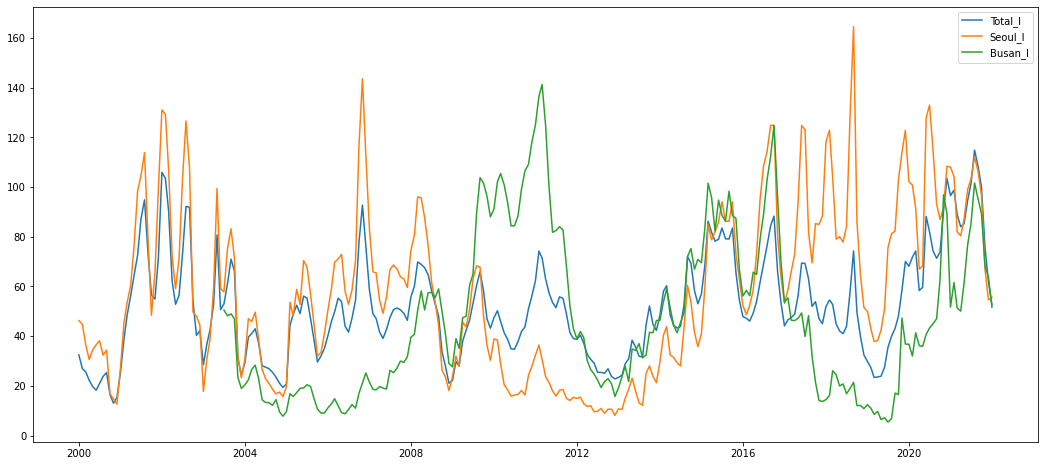

In [29]:
cities = ['Total_I', 'Seoul_I', 'Busan_I']
plt.figure(figsize=(18,8))
for city in cities:
  plt.plot(ta_df[city])
plt.legend(cities)
plt.show()

Sensitivity on the Housing transaction by region

Jeonse demand & supply trends by region

Sensitivity on the jeonse transaction by region